In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import * 

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


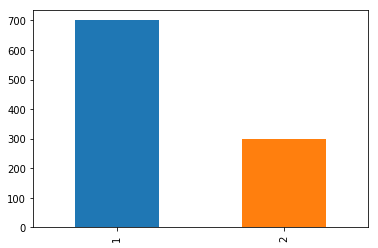

In [4]:
df.default.value_counts().plot.bar()

In [5]:
df.default.value_counts() / len(df.default)

1    0.7
2    0.3
Name: default, dtype: float64

In [45]:
target = "default"
y = np.where(df.default == 2, 1, 0)
X = df.copy()
del X[target]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1, include_bias=False)),
    ("est", ensemble.RandomForestClassifier(max_depth = 7, random_state = 1))
])

pipe.fit(X_train, y_train)

y_test_pred = pipe.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.7566666666666667

In [8]:
from mlxtend.plotting import plot_confusion_matrix

(<matplotlib.figure.Figure at 0x1a0fabcc18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0f7af2b0>)

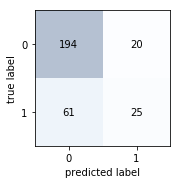

In [9]:
 plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

Text(0,0.5,'TPR')

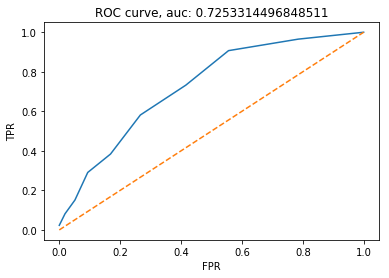

In [10]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls = "--")
auc = metrics.auc(fpr, tpr)
plt.title("ROC curve, auc: " + str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")

In [48]:
param_grid = {
    "est__max_depth": np.arange(2, 10) 
}

grid = model_selection.GridSearchCV(pipe, param_grid, cv = 5,                           
        verbose = True, scoring = "roc_auc")
grid.fit(X_train, y_train)
accuracy = metrics.accuracy_score(y_test, 
                grid.best_estimator_.predict(X_test))
print("Accuracy score for testing dataset", accuracy)
print("AUC: ", grid.best_score_)
print("Best params: ", grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Accuracy score for testing dataset 0.7466666666666667
AUC:  0.767159927436399
Best params:  {'est__max_depth': 8}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished
